# TD : Vision par ordinateur : traitement d’image

### Prérequis

Préparation d’un environnement de travail python et installation du paquet OpenCV :  
Documentation : https://docs.python.org/fr/3/tutorial/venv.html

1. Créer un dossier 📂 *VisionIndustrielle* (sur votre bureau par exemple) et ouvrer ce dossier
2. Fait shift + clic droit à l'intérieur du dossier 📂 *VisionIndustrielle* 
3. Puis cliquer sur  `Ouvrir la fenêtre PowerShell ici`
3. Executer les commandes suivantes pour l'installation d'un environnement python pour le traitement d'image

```
> python --version                                 # vérifier la version de python en 3.11
> python -m venv opencv_env                        # création d'un environnement virtuel "opencv_env"
> .\opencv_env\Scripts\activate                    # activation de l'environnement virtuel
> python -m pip install --upgrade pip              # procéder à la mise à jour de l'installeur de package
> pip install jupyter opencv-python matplotlib     # installer des librairies opencv et matplotlib
```

In [9]:
#!pip install opencv-python matplotlib ipykernel
import cv2
import numpy as np

### Lecture d'une image en niveau de gris
1. Regarder la documentation de la fonction ```cv2.imread```.  Voir la documentation en ligne https://docs.opencv.org/.
2. Utiliser la fonction ```cv2.imread``` pour lire l'image ```"../images/fruits.jpg"``` avec le paramètre de lecture ```cv2.IMREAD_GRAYSCALE```
3. Afficher les dimensions de l'image (attribut ```.shape```) et identifier les indices des lignes et colonnes


In [10]:
fruits_gray = cv2.imread("../images/fruits.jpg", cv2.IMREAD_GRAYSCALE) 
print("Shape of the loaded image is", fruits_gray.shape)

Shape of the loaded image is (421, 767)


### Affichage d'une image avec le package matplotlib
1. Regarder la documentation de la fonction ```imshow``` avec le paramètre ```cmap="gray"``` du package ```matplotlib```
2. Modifier le paramètre ```cmap="gray"``` (voir la documentation)
3. Créer une fonction ```implot``` pour faciliter l'affichage des images futures.

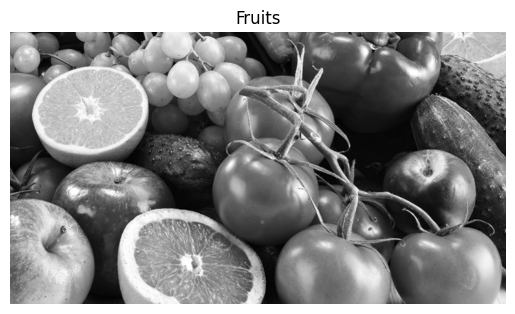

In [11]:
from matplotlib import pyplot as plt
plt.imshow(fruits_gray, cmap="gray")
plt.title('Fruits')
plt.axis('off')
plt.show()

In [12]:
def implot(img, title = None, cmap="gray", **kwargs):
    plt.imshow(img, cmap=cmap, **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

### Image en couleur
1. Utiliser la fonction ```cv2.imread``` pour lire l'image ```"../images/fruits.jpg"``` avec le paramètre de lecture ```cv2.IMREAD_UNCHANGED```
2. Afficher la dimension de l'image (```.shape```), identifier les indices des lignes, colonnes et couleurs.
3. Afficher l'image couleur via la fonction ```implot```
4. Rechercher des informations sur l'encodage d'une image couleur sur ordinateur (encodage RGB, BGR, LAB, HSV, etc...).
5. Rechercher ce qu'est un ```filtre de Bayer``` pour les capteurs.

Shape of the loaded image is (421, 767, 3)


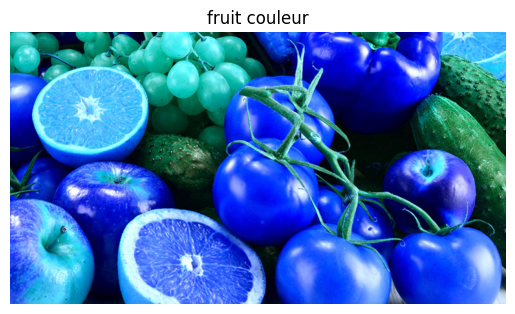

In [13]:
fruits_bgr = cv2.imread("../images/fruits.jpg", cv2.IMREAD_UNCHANGED) 
print("Shape of the loaded image is", fruits_bgr.shape)
implot(fruits_bgr, "fruit couleur")

### Affichage de l'image en couleur avec OpenCV
1. Utiliser la fonction opencv ```cv2.imshow``` et ```cv2.waitKey```. Rechercher des exemples sur la documentation en ligne de opencv.
2. Créer une fonction ```imshow_cv``` pour faciliter l'affichage des images futures


In [14]:
def imshow_cv(image,  winname = 'Image OpenCV', swapBR = False):
    if swapBR:
        image = image[...,[2,1,0]]
    cv2.imshow(winname, image)
    while(True):        # boucle d'affichage de l'image
        k = cv2.waitKey(60)
        if not cv2.getWindowProperty(winname, cv2.WND_PROP_VISIBLE):  # when window is close get out of the loop
            break
        if k == -1:  # if no key was pressed, -1 is returned
            continue
        else:
            break
    cv2.destroyAllWindows()

imshow_cv(fruits_bgr, "fruits_bgr")

### Convertir l'image en RGB pour l'afficher correctement avec matplotlib
1. Utiliser les instructions Python en inversant directement les canaux couleurs par manipulation des indices de tableau.  
2. ou en utilisant la fonction ```cv2.cvtColor```. Regarder la documentation.

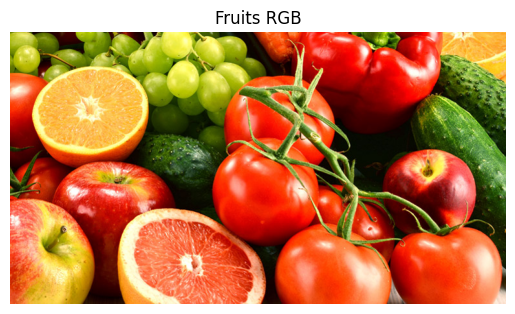

In [15]:
# 1. Manipulation des indices de tableau
fruits_rgb = fruits_bgr[...,[2,1,0]]
implot(fruits_rgb, "Fruits RGB")

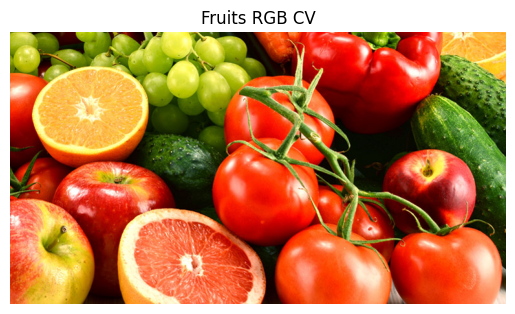

In [16]:
# 2. En utilisant la fonction opencv
fruits_rgb_cv = cv2.cvtColor(fruits_bgr, cv2.COLOR_BGR2RGB)
implot(fruits_rgb_cv, "Fruits RGB CV")

### Afficher les images des différents canaux de couleurs (Rouge, Vert, Bleu)
1. Afficher le canal rouge, le canal vert et le canal bleu. 
2. Concaténer les images des canaux dans une seule image de dimensions (3\*largeur x hauteur ou largeur x 3\*hauteur) (voir ```np.vstack``` ou ```cv2.hconcat```)
3. Afficher l'image concaténée.
4. Afficher les différents canaux pour les encodages LAB, HSV. Utiliser ```cv2.cvtColor``` pour le passage vers l'encodages LAB, HSV.

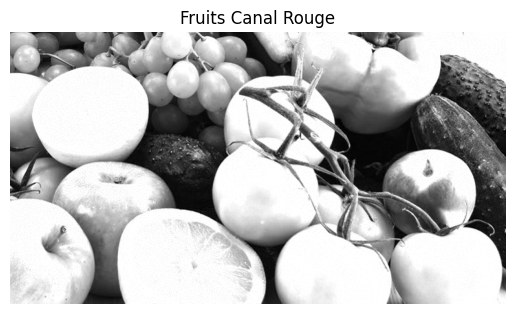

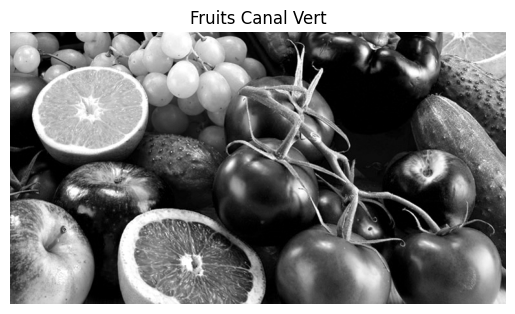

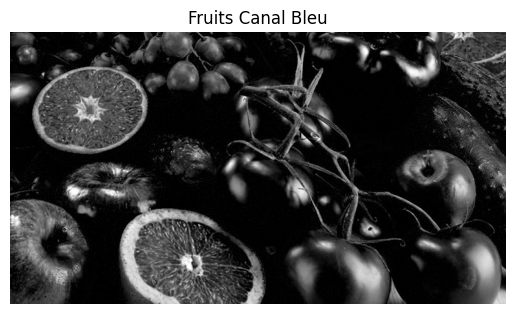

In [17]:
fruits_rouge = fruits_rgb[...,0]
fruits_vert = fruits_rgb[...,1]     
fruits_bleu = fruits_rgb[...,2]

implot(fruits_rouge, "Fruits Canal Rouge")
implot(fruits_vert, "Fruits Canal Vert")
implot(fruits_bleu, "Fruits Canal Bleu")

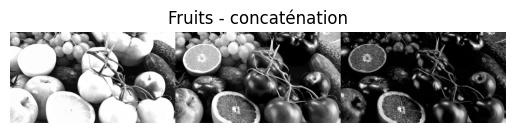

In [18]:
fruits_concat = cv2.hconcat([fruits_rouge, fruits_vert, fruits_bleu])
implot(fruits_concat, "Fruits - concaténation")

### Opérations élémentaires entre images en niveaux de gris
1. Sélectionner le canal rouge, le canal vert et/ou bleu   
2. Tester des opérations d'addition, soustraction, multiplication entre les canaux  
(en utilisant directement les opérateurs ```numpy + - / *``` ou les fonctions ```opencv``` (```cv2.add```, ```cv::subtract```, ```cv::multiply```, ```cv::divide``` ...))
3. Est-ce que les résultats vous semblent cohérents ? Quel est la dynamique/profondeur (depth) de l'image (afficher celle-ci avec l'instruction  ```nom_de_mon_image.dtype```)
4. Changer la profondeur des images pour le calcul en float 32 bits. Utiliser la méthode numpy ```mon_image.astype(np.float32)``` pour le passage en float 32bits.

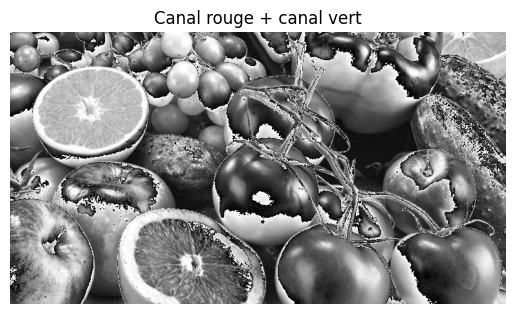

fruits_rouge profondeur : uint8


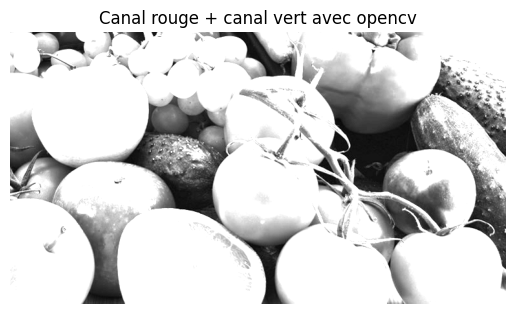

fruits_rouge profondeur : uint8


In [19]:
image_rv = fruits_rouge + fruits_vert
implot(image_rv, "Canal rouge + canal vert")
print("fruits_rouge profondeur :", image_rv.dtype)

image_rv_cv = cv2.add(fruits_rouge,fruits_vert)
implot(image_rv_cv, "Canal rouge + canal vert avec opencv")
print("fruits_rouge profondeur :", image_rv_cv.dtype)

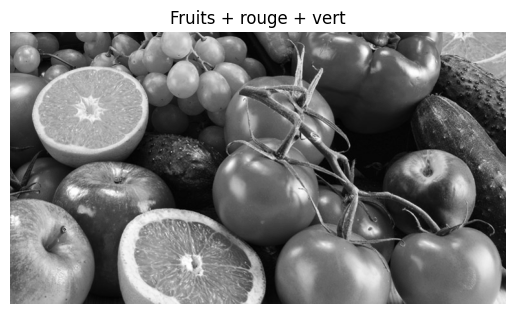

In [20]:
image_rv = fruits_rouge.astype(np.float32) + fruits_vert.astype(np.float32) + fruits_bleu.astype(np.float32)
implot(image_rv, "Fruits + rouge + vert")

### Opérations élémentaires entre images couleurs
1. Charger deux images couleurs. Créer une fonction permettant de lire une image (au format BGR) avec ```cv2.imread``` et le paramètre ```cv2.IMREAD_UNCHANGED```  tout en convertissant automatiquement l'image au format RGB pour les affichages futurs.
2. Tester des opérations élémentaires sur des images couleurs
(en utilisant directement les opérateurs ```numpy + - / *``` ou les fonctions ```opencv``` (```cv2.add```, ```cv::subtract```, ```cv::multiply```, ```cv::divide```, ```cv::divide```, ```cv.addWeighted```, ...))
3. Tester des opérateurs binaires  (les fonctions *```numpy```* : ```np.bitwise_and```, ```np.bitwise_or```, ```np.bitwise_xor```, ```np.bitwise_or``` ou les fonctions *```opencv```* : ```cv2.bitwise_and```, ```cv2.bitwise_or```, ```cv2.bitwise_xor```, ```cv2.bitwise_or```)

### Filtrage 
 
1. Sur une image de votre choix, appliquer un filtre de type  ```cv2.boxFilter```, ```cv2.GaussianBlur```.  
3. Faire la même chose avec un filtre Median  ```cv2.medianBlur```.  

### Fonction de génération aléatoire de bruit gaussien :

In [21]:
# fonction pour ajouter artificiellement du bruit à une image
def add_noise(img, mean = 0, stddev = 36, threshold = None):
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, np.asarray([mean,mean,mean]),  np.asarray([stddev,stddev,stddev]))
    if threshold:
        noise = np.where(noise>threshold, noise, 0)
    noisy_img = cv2.add(img, noise)
    return noisy_img

### Filtrage du bruit.
1. Tester ces filtres sur une image bruitée (utiliser la fonction ```add_noise``` donnée précédemment pour ajouter artificiellement du bruit à une image).  
2. Tester différents paramètres de bruits et de filtrage (```cv2.boxFilter```, ```cv2.GaussianBlur```, ```cv2.medianBlur```).



### Filtrage pour la détection de contours 
1. Tester sur une image couleur un filtre de type gradient (```cv2.Sobel```  suivant la direction X et Y).  
2. Changer les paramètres des filtres.  
3. Utiliser la fonction ```cv2.magnitude``` ou ```cv2.convertScaleAbs``` et ```cv2.addWeighted``` pour combiner les gradient dans la direction X et Y.
4. Utiliser la fonction ```cv2.normalize``` avec le paramètre ```norm_type=cv2.NORM_MINMAX``` pour faciliter l'affichage.
5. Tester la fonction ```cv2.Laplacian```.

### Fonction de seuillage / Segmentation

1. Additionner les canaux R,G,B de l'image gradient.
1. Effectuer un seuillage d'une image en niveau de gris (ou le canal R, G ou B d'une image) - ```cv2.threshold``` ou ```cv2.adaptiveThreshold```, ```cv2.inRange```


### Morphologie mathématique 

1. Sur une image segmentée, tester les fonctions morphologiques (```cv2.erode```, ```cv2.dilate```, ```cv.morphologyEx```)
2. Qu'est ce qu'une ouverture, une dilatation ?

### Détection de contours : Canny

1. Utiliser la fonction avancée de détection de contour ```cv2.Canny```.
2. Utiliser la fonction ```cv2.countNonZero``` pour compter le nombre de pixels formant les contours.

### Manipulation des images
1. Tester la fonction ```cv2.resize```.
2. Tester la fonction ```cv2.pyrDown```.
3. Tester la fonction ```cv2.flip``` avec différents paramètres.
4. Sélectionner une région d’intérêt dans une image.

### Dessin dans une image

1. Rechercher comment afficher du texte avec OpenCV  ```cv2.putText```.
2. Comment afficher une ligne ```cv2.line```.
3. Un rectangle ```cv2.rectangle```.
4. Un cercle ```cv2.circle```.
5. Une ellipse ```cv2.ellipse```.

### Afficher l'histogramme du canal rouge
1. Sélectionner l'image du canal rouge.  
2. Chercher des informations sur ce qu'est un histogramme.
3. Calculer son histogramme  ```cv2.calcHist``` ou ```np.histogram```.
5. Afficher son histogramme  ```plt.hist```.

### Aller plus loin

Tutorial de traitement d'image :  
https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html  
https://docs.opencv.org/4.8.0/d2/d96/tutorial_py_table_of_contents_imgproc.html

### Application à la détection de défaut : Contrôle d'ébréchure

1. Charger l'image ```"../images/controle-ebrechure.jpg"``` et l'image ```"../images/controle-ebrechure_2.jpg"```.
2. Effectuer la différence de ces deux images.
3. Effectuer un seuillage sur la différence des deux images.
5. Compter le nombre de pixels différents dans l'image seuillée avec la fonction ```cv2.countNonZero```.
4. Faire la même chose mais en rajoutant du bruit dans les images avec la fonction ```add_noise```.